In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# get data
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteWKCI4O/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteWKCI4O/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='/root/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    sp

In [ ]:
# process data

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 4
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
# monitor
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

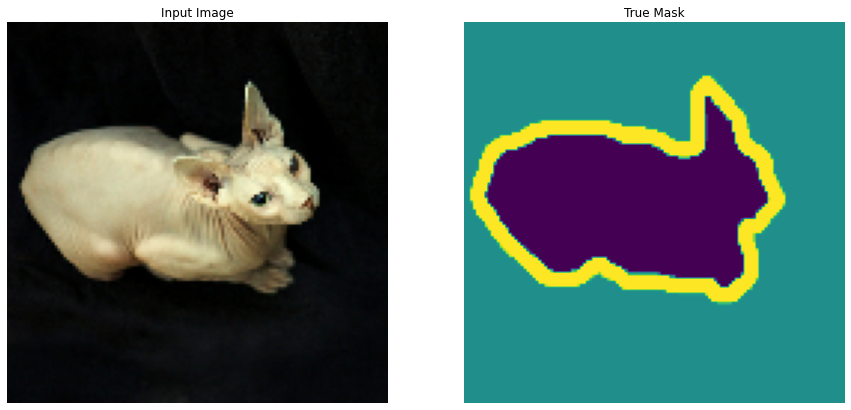

In [ ]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])

In [ ]:
# method 1
# model = tf.keras.Sequential()    

# # block 1
# model.add(tf.keras.layers.Conv2D(64, 1, padding='same', activation='LeakyReLU', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.BatchNormalization())

# # block 2
# model.add(tf.keras.layers.Conv2D(64, 1, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # block 3
# model.add(tf.keras.layers.Conv2D(64, 1, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # output
# model.add(tf.keras.layers.Conv2D(3, 1, padding='same'))

# model.summary()

In [ ]:
# method 2
# model = tf.keras.Sequential()    

# # block 1
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.BatchNormalization())

# # block 2
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # block 3
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # output
# model.add(tf.keras.layers.Conv2D(3, 5, padding='same'))

# model.summary()

In [ ]:
# # method 3
# model = tf.keras.Sequential()    

# # block 1
# model.add(tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.BatchNormalization())

# # block 2
# model.add(tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # block 3
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # block 4
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # block 5
# model.add(tf.keras.layers.Conv2D(64, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# # output
# model.add(tf.keras.layers.Conv2D(3, 3, padding='same'))

# model.summary()

In [ ]:
# # method 4
# model = tf.keras.Sequential()    

# # block 1
# model.add(tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 2
# model.add(tf.keras.layers.Conv2D(128, 9, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 3
# model.add(tf.keras.layers.Conv2D(256, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 4
# model.add(tf.keras.layers.Conv2D(512, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 5
# model.add(tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 5
# model.add(tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # output 
# model.add(tf.keras.layers.Conv2D(128*128*3, 2))
# model.add(tf.keras.layers.Reshape((128,128,3)))

# model.summary()

In [ ]:
# method 5
# model = tf.keras.Sequential()    

# # block 1
# model.add(tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 2
# model.add(tf.keras.layers.Conv2D(128, 9, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 3
# model.add(tf.keras.layers.Conv2D(256, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 4
# model.add(tf.keras.layers.Conv2D(512, 5, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # block 5
# model.add(tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())

# # upsampling
# model.add(tf.keras.layers.UpSampling2D())
# model.add(tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.UpSampling2D())
# model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.UpSampling2D())
# model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.UpSampling2D())
# model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='LeakyReLU'))
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.UpSampling2D())
# model.add(tf.keras.layers.Conv2D(3, 3, padding='same'))

# model.summary()

In [ ]:
# method 6
# inputs = tf.keras.layers.Input(shape=[128, 128, 3])    
# x = inputs  

# # block 1
# x = tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# pre1 = x

# # block 2
# x = tf.keras.layers.Conv2D(128, 9, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# pre2 = x

# # block 3
# x = tf.keras.layers.Conv2D(256, 5, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# pre3 = x

# # block 4
# x = tf.keras.layers.Conv2D(512, 5, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# pre4 = x

# # block 5
# x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# # upsampling
# x = tf.keras.layers.UpSampling2D()(x)
# x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)

# x = tf.keras.layers.Add()([x, pre4])

# # upsampling
# x = tf.keras.layers.UpSampling2D()(x)
# x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)

# x = tf.keras.layers.Add()([x, pre3])

# # upsampling
# x = tf.keras.layers.UpSampling2D()(x)
# x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)

# x = tf.keras.layers.Add()([x, pre2])

# # upsampling
# x = tf.keras.layers.UpSampling2D()(x)
# x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)

# x = tf.keras.layers.Add()([x, pre1])

# # upsampling
# x = tf.keras.layers.UpSampling2D()(x)
# x = tf.keras.layers.Conv2D(3, 3, padding='same')(x)

# model = tf.keras.Model(inputs=[inputs], outputs=[x])
# model.summary()

In [ ]:
# # method 7
# inputs = tf.keras.layers.Input(shape=[128, 128, 3])    
# x = inputs  

# r = 2

# # block 1
# x = tf.keras.layers.Conv2D(64, 9, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# pre1 = x

# # block 2
# x = tf.keras.layers.Conv2D(128, 9, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# pre2 = x

# # block 3
# x = tf.keras.layers.Conv2D(256, 5, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# pre3 = x

# # block 4
# x = tf.keras.layers.Conv2D(512, 5, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# pre4 = x

# # block 5
# x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)

# # upsampling
# x = tf.keras.layers.Conv2D(512*r*r, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.nn.depth_to_space(x, r)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Add()([x, pre4])

# # upsampling
# x = tf.keras.layers.Conv2D(256*r*r, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.nn.depth_to_space(x, r)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Add()([x, pre3])

# # upsampling
# x = tf.keras.layers.Conv2D(128*r*r, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.nn.depth_to_space(x, r)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Add()([x, pre2])

# # upsampling
# x = tf.keras.layers.Conv2D(64*r*r, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.nn.depth_to_space(x, r)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Add()([x, pre1])

# # upsampling
# x = tf.keras.layers.Conv2D(32*r*r, 3, padding='same', activation='LeakyReLU')(x)
# x = tf.nn.depth_to_space(x, r)
# x = tf.keras.layers.Conv2D(3, 3, padding='same')(x)

# model = tf.keras.Model(inputs=[inputs], outputs=[x])
# model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout, Add

In [ ]:
# inputs = tf.keras.layers.Input(shape=[128, 128, 3])    
# x = inputs  

# # block 1
# x = tf.keras.layers.Conv2D(64, 4, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dropout(0.25)(x)
# pre1 = x

# # block 2
# x = tf.keras.layers.Conv2D(128, 4, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dropout(0.25)(x)

# pre2 = x

# # block 3
# x = tf.keras.layers.Conv2D(256, 4, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dropout(0.25)(x)

# pre3 = x

# # block 4
# x = tf.keras.layers.Conv2D(512, 4, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dropout(0.25)(x)

# pre4 = x

# # block 5
# x = tf.keras.layers.Conv2D(512, 4, padding='same', activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dropout(0.25)(x)

# # upsampling
# x = tf.keras.layers.Conv2DTranspose(512, 4, padding='same', strides=2, activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)

# x = tf.keras.layers.Add()([x, pre4])

# # upsampling
# x = tf.keras.layers.Conv2DTranspose(256, 4, padding='same', strides=2, activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = Dropout(0.25)(x)

# x = tf.keras.layers.Add()([x, pre3])

# # upsampling
# x = tf.keras.layers.Conv2DTranspose(128, 4, padding='same', strides=2, activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = Dropout(0.25)(x)

# x = tf.keras.layers.Add()([x, pre2])

# # upsampling
# x = tf.keras.layers.Conv2DTranspose(64, 4, padding='same', strides=2, activation='LeakyReLU')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = Dropout(0.25)(x)

# x = tf.keras.layers.Add()([x, pre1])

# # upsampling
# x = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same')(x)

# model = tf.keras.Model(inputs=[inputs], outputs=[x])
# model.summary()

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

In [ ]:
def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se
    return x

def ASPP(inputs):
    """ Image Pooling """
    shape = inputs.shape
    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(256, 1, padding="same", use_bias=False)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = Conv2D(256, 1, padding="same", use_bias=False)(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])
    y = Conv2D(256, 1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def deeplabv3_plus(shape):
    """ Input """
    inputs = Input(shape)

    """ Encoder """
    encoder = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)

    image_features = encoder.get_layer("conv4_block6_out").output
    x_a = ASPP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)

    x_b = encoder.get_layer("conv2_block2_out").output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation('relu')(x_b)

    x = Concatenate()([x_a, x_b])
    x = SqueezeAndExcite(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SqueezeAndExcite(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    outputs = Conv2D(3, 1, padding="same", activation = "softmax")(x)

    model = Model(inputs, outputs)
    return model

In [ ]:
model = deeplabv3_plus([128, 128, 3])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                 create_mask(model.predict(sample_image[tf.newaxis, ...]))])
        
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):        
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 2s 2s/step


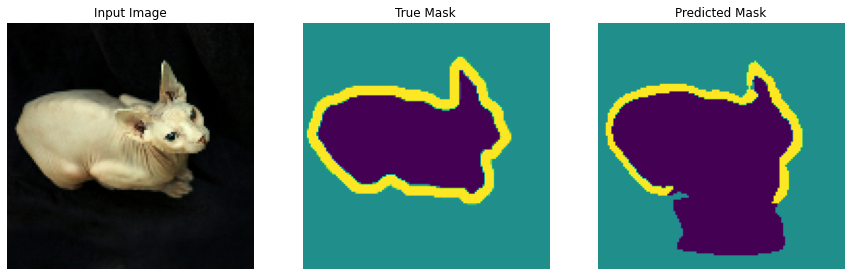


Sample Prediction after epoch 1

920/920 [==============================] - 136s 90ms/step - loss: 0.4297 - accuracy: 0.8249 - val_loss: 0.4710 - val_accuracy: 0.8088
Epoch 2/20
1/1 [==============================] - 0s 30ms/step


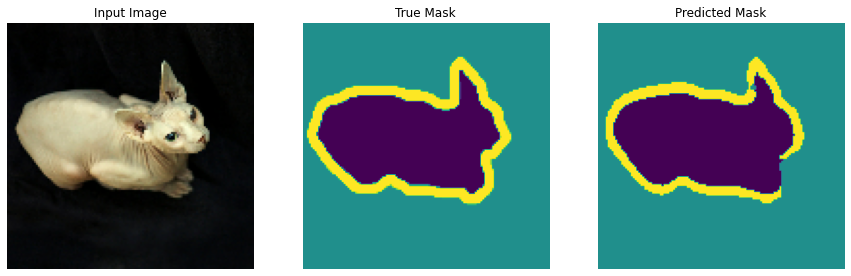


Sample Prediction after epoch 2

920/920 [==============================] - 72s 78ms/step - loss: 0.3613 - accuracy: 0.8530 - val_loss: 0.5065 - val_accuracy: 0.8017
Epoch 3/20
1/1 [==============================] - 0s 31ms/step


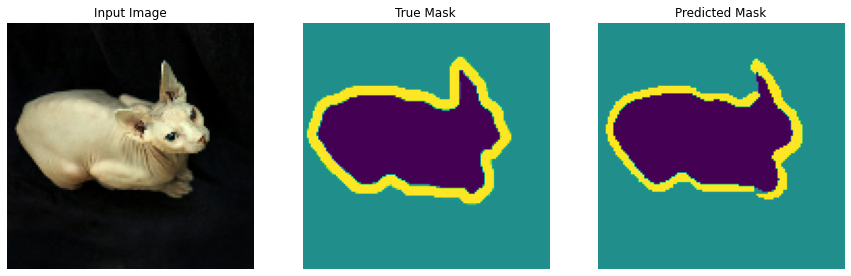


Sample Prediction after epoch 3

920/920 [==============================] - 71s 77ms/step - loss: 0.3368 - accuracy: 0.8626 - val_loss: 0.3633 - val_accuracy: 0.8485
Epoch 4/20
1/1 [==============================] - 0s 44ms/step


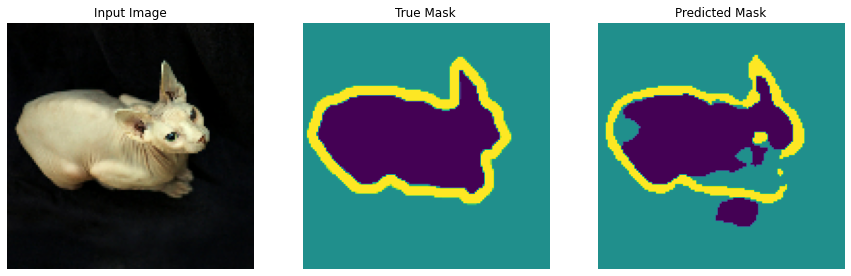


Sample Prediction after epoch 4

920/920 [==============================] - 70s 76ms/step - loss: 0.3091 - accuracy: 0.8730 - val_loss: 0.5014 - val_accuracy: 0.7926
Epoch 5/20
1/1 [==============================] - 0s 29ms/step


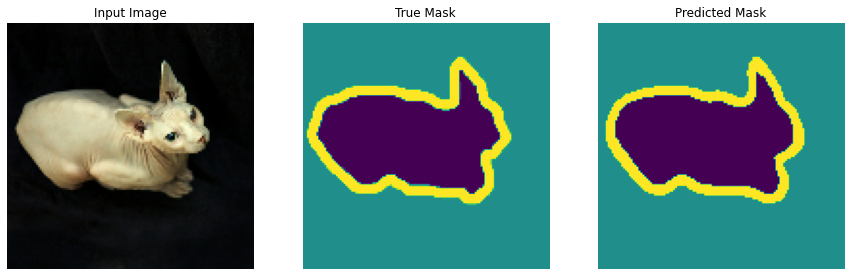


Sample Prediction after epoch 5

920/920 [==============================] - 68s 74ms/step - loss: 0.2960 - accuracy: 0.8781 - val_loss: 0.3569 - val_accuracy: 0.8588
Epoch 6/20
1/1 [==============================] - 0s 35ms/step


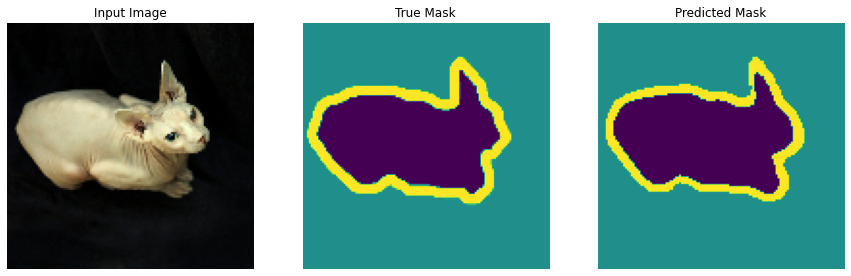


Sample Prediction after epoch 6

920/920 [==============================] - 70s 76ms/step - loss: 0.2763 - accuracy: 0.8859 - val_loss: 0.3454 - val_accuracy: 0.8611
Epoch 7/20
1/1 [==============================] - 0s 31ms/step


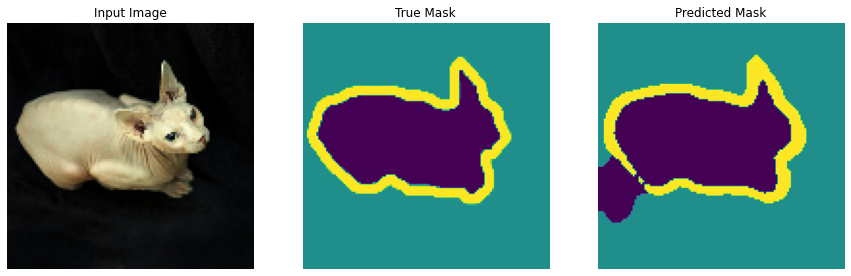


Sample Prediction after epoch 7

920/920 [==============================] - 69s 76ms/step - loss: 0.2667 - accuracy: 0.8897 - val_loss: 0.4940 - val_accuracy: 0.8170
Epoch 8/20
1/1 [==============================] - 0s 30ms/step


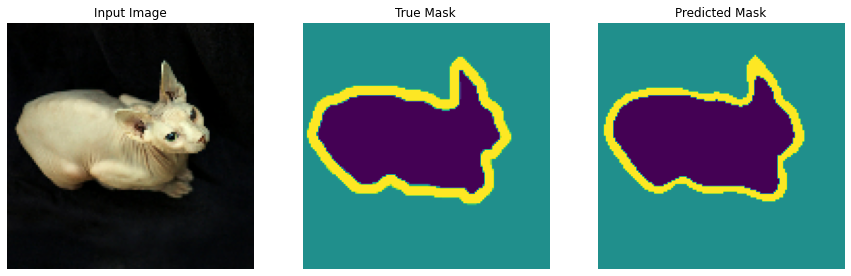


Sample Prediction after epoch 8

920/920 [==============================] - 71s 77ms/step - loss: 0.2596 - accuracy: 0.8923 - val_loss: 0.3571 - val_accuracy: 0.8532
Epoch 9/20
1/1 [==============================] - 0s 31ms/step


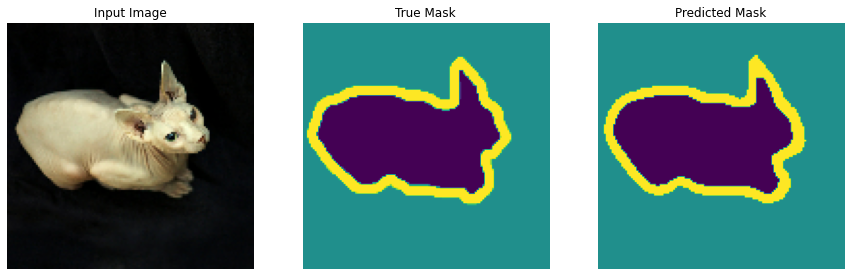


Sample Prediction after epoch 9

920/920 [==============================] - 70s 76ms/step - loss: 0.2450 - accuracy: 0.8965 - val_loss: 0.3043 - val_accuracy: 0.8800
Epoch 10/20
1/1 [==============================] - 0s 48ms/step


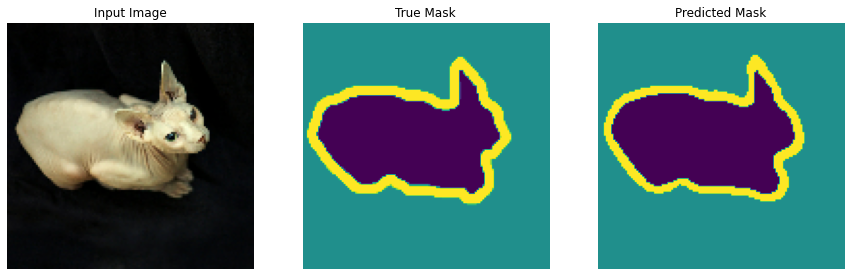


Sample Prediction after epoch 10

920/920 [==============================] - 70s 77ms/step - loss: 0.2324 - accuracy: 0.9017 - val_loss: 0.2891 - val_accuracy: 0.8811
Epoch 11/20
1/1 [==============================] - 0s 31ms/step


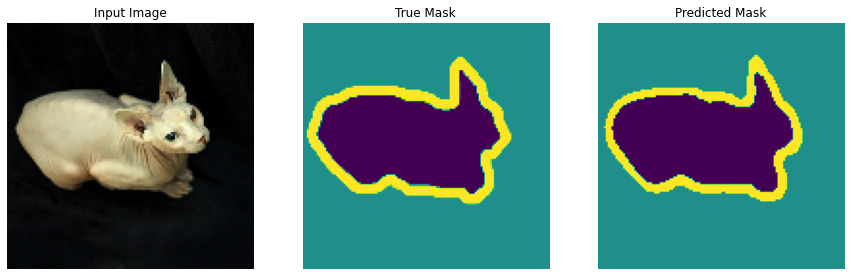


Sample Prediction after epoch 11

920/920 [==============================] - 70s 77ms/step - loss: 0.2286 - accuracy: 0.9029 - val_loss: 0.3735 - val_accuracy: 0.8496
Epoch 12/20
1/1 [==============================] - 0s 29ms/step


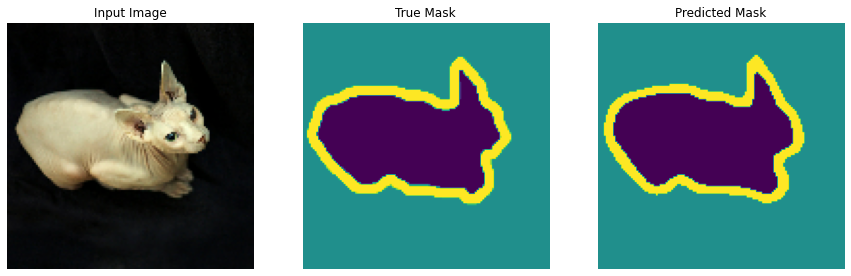


Sample Prediction after epoch 12

920/920 [==============================] - 71s 78ms/step - loss: 0.2212 - accuracy: 0.9060 - val_loss: 0.2948 - val_accuracy: 0.8812
Epoch 13/20
1/1 [==============================] - 0s 30ms/step


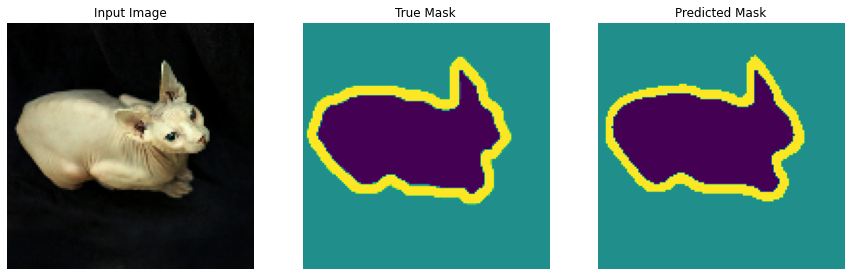


Sample Prediction after epoch 13

920/920 [==============================] - 70s 76ms/step - loss: 0.2092 - accuracy: 0.9101 - val_loss: 0.4019 - val_accuracy: 0.8362
Epoch 14/20
1/1 [==============================] - 0s 29ms/step


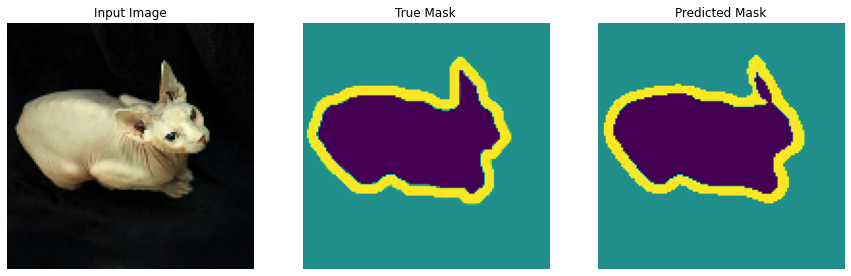


Sample Prediction after epoch 14

920/920 [==============================] - 70s 76ms/step - loss: 0.2143 - accuracy: 0.9087 - val_loss: 0.2924 - val_accuracy: 0.8804
Epoch 15/20
1/1 [==============================] - 0s 49ms/step


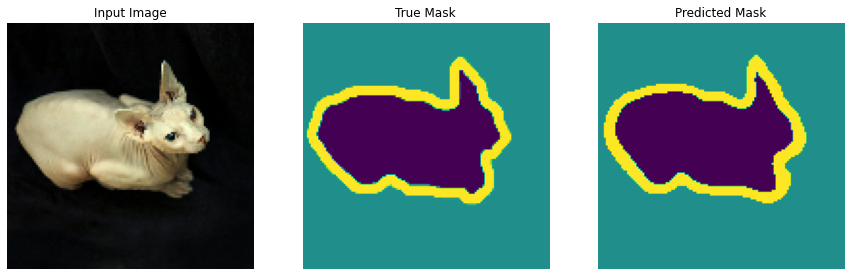


Sample Prediction after epoch 15

920/920 [==============================] - 71s 77ms/step - loss: 0.1971 - accuracy: 0.9147 - val_loss: 0.3567 - val_accuracy: 0.8579
Epoch 16/20
1/1 [==============================] - 0s 31ms/step


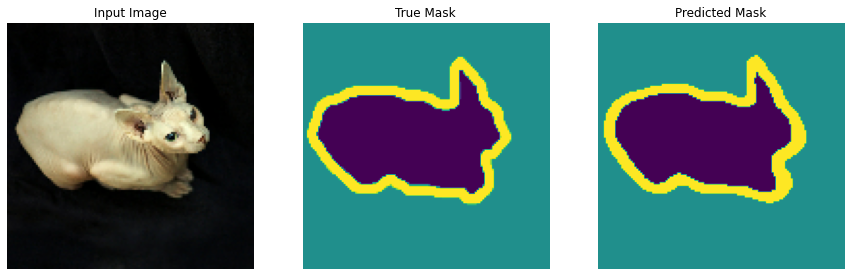


Sample Prediction after epoch 16

920/920 [==============================] - 73s 79ms/step - loss: 0.1897 - accuracy: 0.9173 - val_loss: 0.4500 - val_accuracy: 0.8260
Epoch 17/20
1/1 [==============================] - 0s 30ms/step


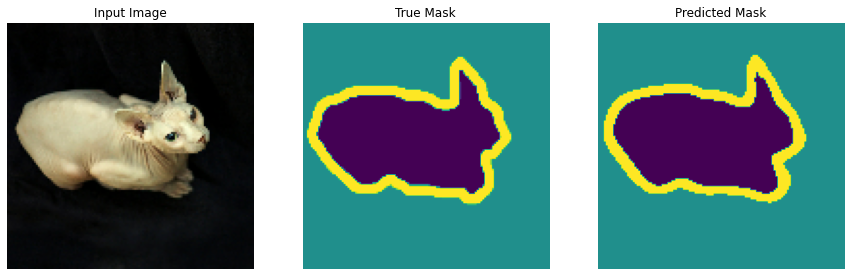


Sample Prediction after epoch 17

920/920 [==============================] - 72s 78ms/step - loss: 0.1947 - accuracy: 0.9155 - val_loss: 0.2867 - val_accuracy: 0.8923
Epoch 18/20
1/1 [==============================] - 0s 31ms/step


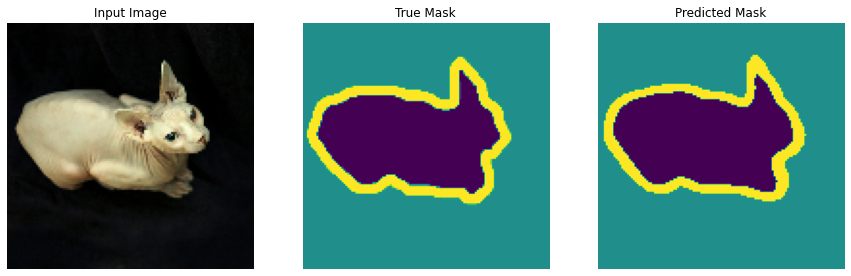


Sample Prediction after epoch 18

920/920 [==============================] - 70s 76ms/step - loss: 0.1943 - accuracy: 0.9160 - val_loss: 0.2845 - val_accuracy: 0.8918
Epoch 19/20
1/1 [==============================] - 0s 32ms/step


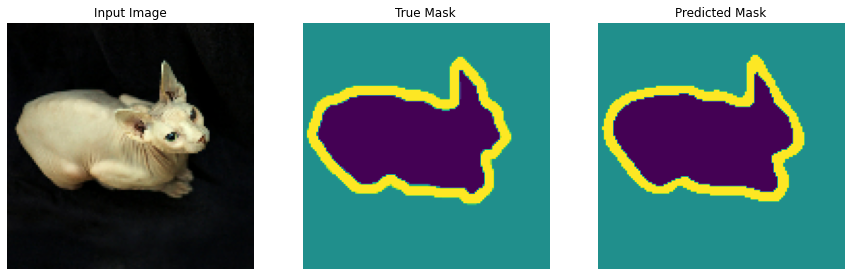


Sample Prediction after epoch 19

920/920 [==============================] - 73s 79ms/step - loss: 0.1783 - accuracy: 0.9217 - val_loss: 0.3315 - val_accuracy: 0.8809
Epoch 20/20
1/1 [==============================] - 0s 39ms/step


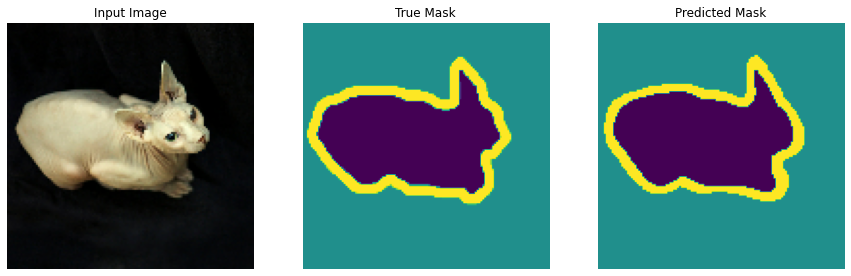


Sample Prediction after epoch 20

920/920 [==============================] - 74s 80ms/step - loss: 0.1818 - accuracy: 0.9205 - val_loss: 0.2956 - val_accuracy: 0.8867


In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

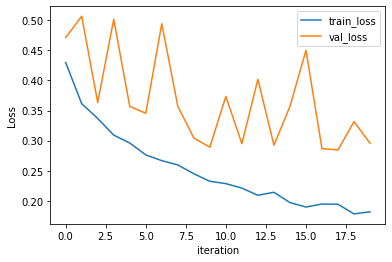

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = "train_loss")
plt.plot(model_history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()




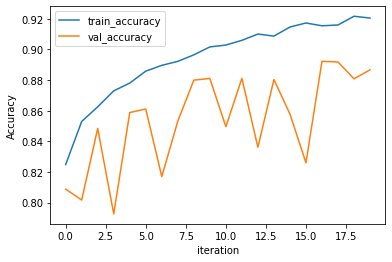

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = "train_accuracy")
plt.plot(model_history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

1/1 [==============================] - 0s 53ms/step


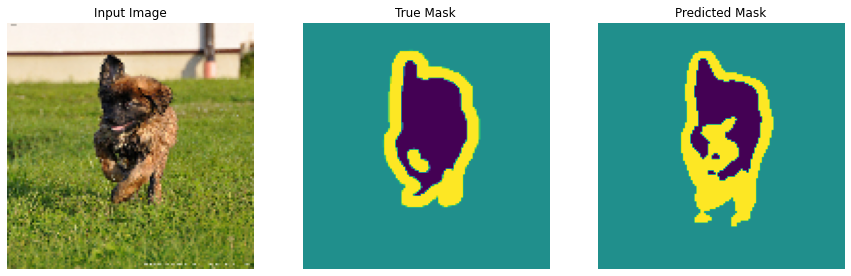

1/1 [==============================] - 0s 50ms/step


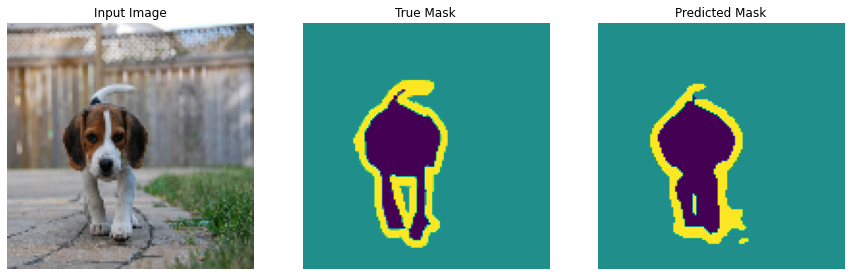

1/1 [==============================] - 0s 51ms/step


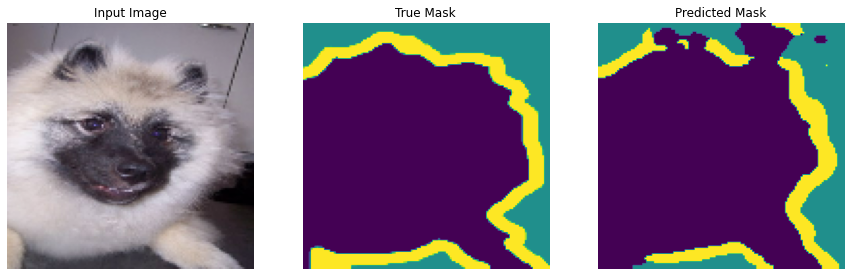

1/1 [==============================] - 0s 47ms/step


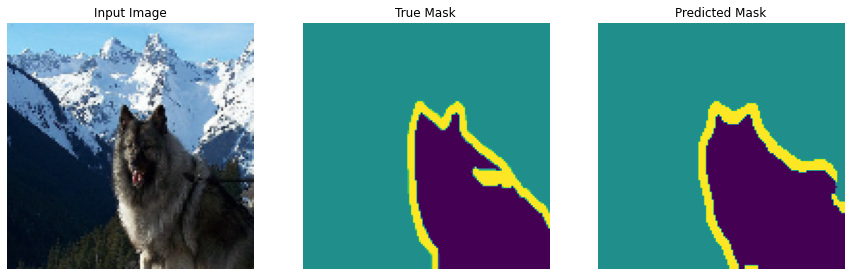

1/1 [==============================] - 0s 49ms/step


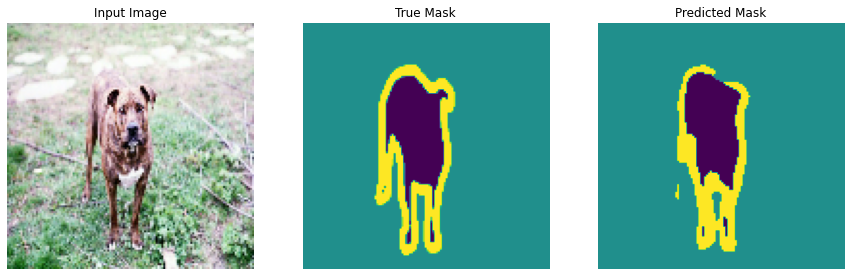

1/1 [==============================] - 0s 50ms/step


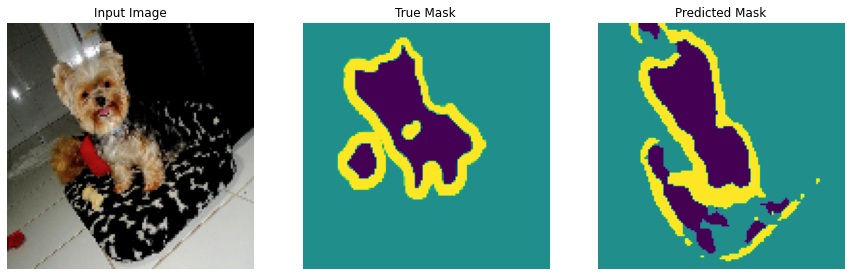

1/1 [==============================] - 0s 62ms/step


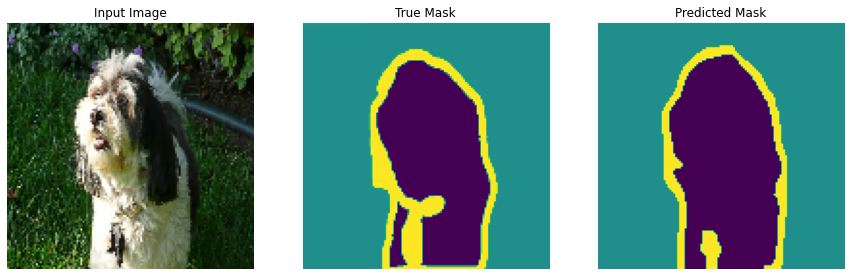

1/1 [==============================] - 0s 67ms/step


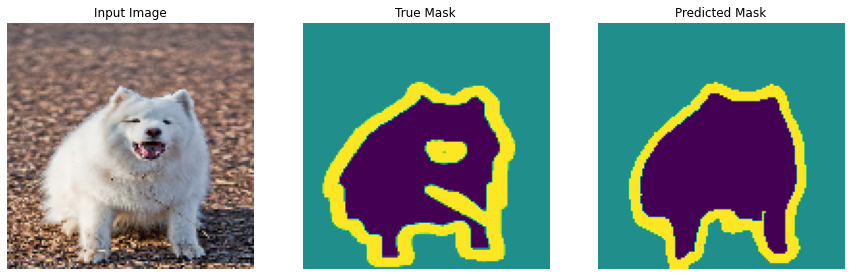

1/1 [==============================] - 0s 59ms/step


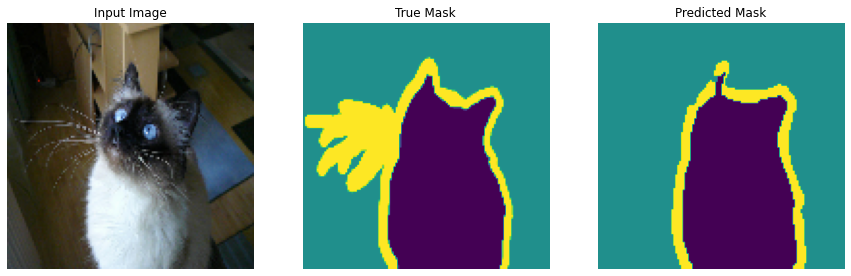

1/1 [==============================] - 0s 66ms/step


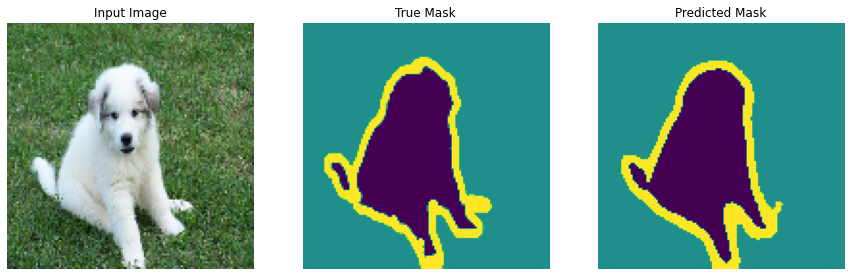

1/1 [==============================] - 0s 75ms/step


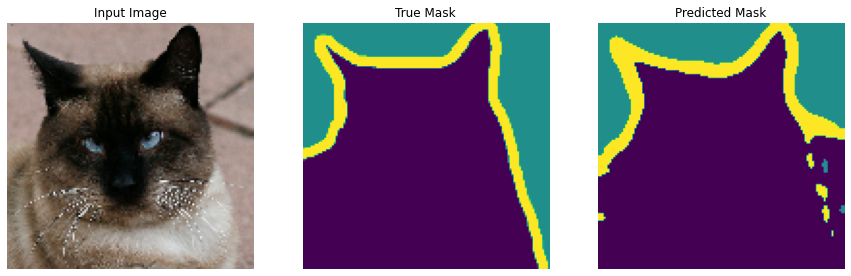

1/1 [==============================] - 0s 48ms/step


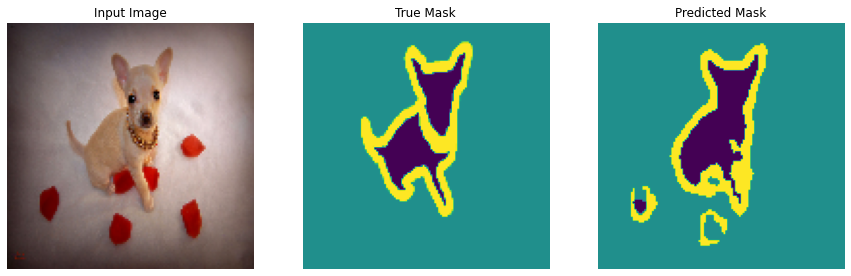

1/1 [==============================] - 0s 56ms/step


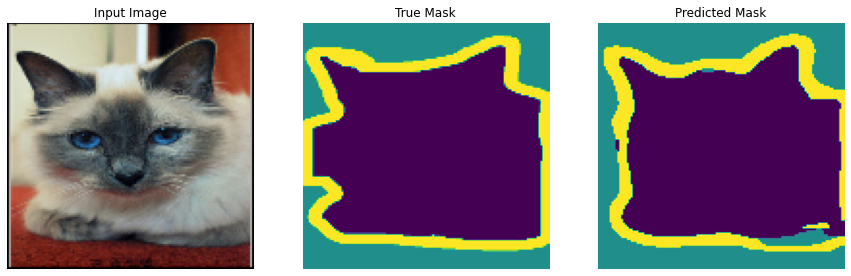

1/1 [==============================] - 0s 51ms/step


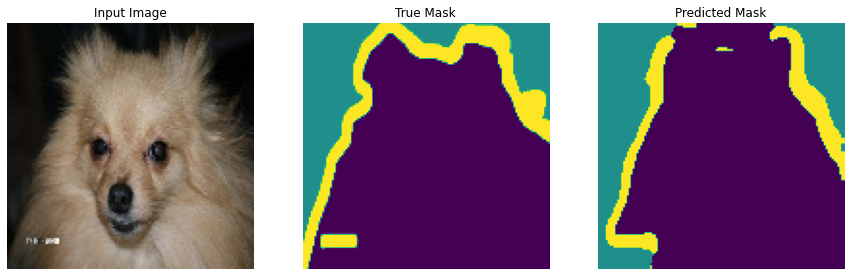

1/1 [==============================] - 0s 50ms/step


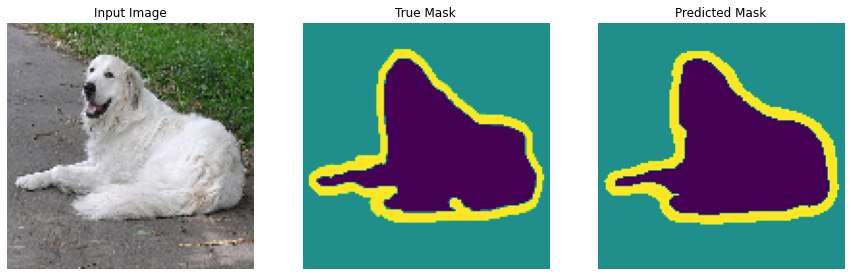

In [ ]:
show_predictions(test_dataset, 15)